# corpus weight
corpus_weight 等于 每个topic中word的数量在整个语料库中word的种类数

#### 导入模型

In [2]:
from corpus import *
from vsm import *
# replace 'topic_range[0]' with a specific number, if you like
k = topic_range[4]
# load the topic model
v = lda_v[k]

Loading LDA data from /home/inpho/kmx/models/kmx-freq5-freq5-N23423523-LDA-K100-document-1500.npz
Loading LDA data from /home/inpho/kmx/models/kmx-freq5-freq5-N23423523-LDA-K100-document-1500.npz


#### 定义 corpus_weight 函数
topic 为某个主题（从0开始）
在每个topic下，按word的权值由小到大对word进行遍历，如果有threshold个相同的权值，最大权值的word作为截止词

In [8]:
def corpus_weight(topic, threshold = 36):    #需要注意的是：这个函数不适合threshold=1的情况
    topic_list = v.topics()[topic]
    adit_number = 0
    # 按权重由大到小对 word 遍历
    for topic_number in range(len(topic_list)-1,0,-1):
        # 如果word的权重与adit_number不相同，threshold减1
        if topic_list[topic_number][1] != adit_number:
            adit_number = topic_list[topic_number][1]
            threshold -= 1
            if threshold == 0:
                break
    #print topic_number
    return float(topic_number)/len(c.words)

#### 寻找最优threshold值
在threshold取不同值的情况下，计算语料库中权重前十的topic，并与Nicholas权重前十匹配

In [4]:
topic_real = [10, 5, 48, 25, 3, 99, 63, 84, 97, 15, 41, 58]
for threshold in range(2,20):
    topic_dict = {}
    # 计算每个topic的 corpus_weight
    for i in range(0, 100):
        topic_dict[i] = corpus_weight(i,threshold)
    # 按照topic_weight从小到大的顺序排列
    topic_dict_order = sorted(topic_dict.items(), key = lambda item : item[1], reverse = True)
    topic = []
    weight = []
    counter = 0
    # 遍历 topic_dict_order ，记录权重前十的topic
    for topic_weight in topic_dict_order:
        #print topic_weight
        topic.append(topic_weight[0])
        weight.append(topic_weight[1])
        counter += 1
        if counter == 10:
            break
    count = 0
    # 与权重前十的topic进行对比，count表示匹配数
    for i in topic:
        if i in topic_real:
            count += 1
    print threshold,count,topic
    print weight

2 2 [0, 1, 2, 3, 4, 6, 7, 8, 9, 10]
[0.9997182701788985, 0.9997182701788985, 0.9997182701788985, 0.9997182701788985, 0.9997182701788985, 0.9997182701788985, 0.9997182701788985, 0.9997182701788985, 0.9997182701788985, 0.9997182701788985]
3 2 [0, 3, 4, 6, 7, 12, 15, 16, 17, 20]
[0.9995774052683477, 0.9995774052683477, 0.9995774052683477, 0.9995774052683477, 0.9995774052683477, 0.9995774052683477, 0.9995774052683477, 0.9995774052683477, 0.9995774052683477, 0.9995774052683477]
4 1 [3, 4, 7, 12, 16, 20, 21, 22, 23, 27]
[0.9994365403577968, 0.9994365403577968, 0.9994365403577968, 0.9994365403577968, 0.9994365403577968, 0.9994365403577968, 0.9994365403577968, 0.9994365403577968, 0.9994365403577968, 0.9994365403577968]
5 2 [4, 7, 12, 20, 23, 89, 95, 0, 5, 10]
[0.9992956754472461, 0.9992956754472461, 0.9992956754472461, 0.9992956754472461, 0.9992956754472461, 0.9992956754472461, 0.9992956754472461, 0.9991548105366953, 0.9991548105366953, 0.9991548105366953]
6 1 [7, 12, 23, 30, 89, 92, 36, 42, 6

In [7]:
topic_real = [10, 5, 48, 25, 3, 99, 63, 84, 97, 15, 41, 58]
for threshold in range(20,50):
    topic_dict = {}
    # 计算每个topic的 corpus_weight
    for i in range(0, 100):
        topic_dict[i] = corpus_weight(i,threshold)
    # 按照topic_weight从小到大的顺序排列
    topic_dict_order = sorted(topic_dict.items(), key = lambda item : item[1], reverse = True)
    topic = []
    weight = []
    counter = 0
    # 遍历 topic_dict_order ，记录权重前十的topic
    for topic_weight in topic_dict_order:
        #print topic_weight
        topic.append(topic_weight[0])
        weight.append(topic_weight[1])
        counter += 1
        if counter == 10:
            break
    count = 0
    # 与权重前十的topic进行对比，count表示匹配数
    for i in topic:
        if i in topic_real:
            count += 1
    print threshold,count,topic
    print weight

20 1 [45, 40, 39, 56, 27, 93, 15, 89, 66, 23]
[0.22763769545006338, 0.2183406113537118, 0.18425130300042258, 0.16678405409212566, 0.1634032962389069, 0.1631215664178053, 0.14537258768840683, 0.14368220876179744, 0.13677982814480913, 0.13635723341315678]
21 1 [45, 40, 39, 27, 56, 93, 15, 66, 22, 23]
[0.22707423580786026, 0.21805888153261022, 0.18411043808987182, 0.1632624313283561, 0.159459078743485, 0.14804902098887168, 0.14523172277785604, 0.13649809832370757, 0.13424425975489507, 0.13424425975489507]
22 1 [45, 40, 39, 27, 56, 93, 15, 22, 77, 37]
[0.22693337089730947, 0.21791801662205945, 0.18382870826877024, 0.16283983659670376, 0.15833215945907875, 0.1477672911677701, 0.13297647555993802, 0.13283561064938723, 0.12860966333286378, 0.12734187913790676]
23 1 [45, 40, 39, 27, 56, 93, 22, 15, 77, 37]
[0.2267925059867587, 0.2143963938582899, 0.18368784335821947, 0.1625581067756022, 0.1570643752641217, 0.1470629666150162, 0.13269474573883647, 0.13255388082828568, 0.12804620369066066, 0.126

### 以表的形式显示 corpus weight 前十的 topic

In [9]:
topic_dict = {}
# 计算每个topic的 corpus_weight
for i in range(0, 100):
    topic_dict[i] = corpus_weight(i)
# 按照topic_weight从小到大的顺序排列
topic_dict_order = sorted(topic_dict.items(), key = lambda item : item[1], reverse = True)

topic = []  # 记录前10的topic
weight = []  #前十topic对应的权重
words = []  #前十topic的keywords
count = 0
# 取权重前十的topic及其权重。topic编号记录在topic[]中，对应的权重记录在weight[]中，每个topic下的word记录在word[]中
for topic_weight in topic_dict_order:
    topic.append(topic_weight[0])
    weight.append(topic_weight[1])
    word_weight_list = v.topics()[topic_weight[0]]
    word = []
    for word_weight in word_weight_list:
        word.append(word_weight[0])
    words.append(word)
    count += 1
    if count == 10:
        break
# 画表
from pandas import Series,DataFrame
import pandas as pd
data = {"topic":topic,"corpus_weight":weight,"keywords":words}
DataFrame(data,columns=['topic','corpus_weight','keywords'])

,topic,corpus_weight,keywords
0,45,0.205522,"[人, 中, 生, 日, 大, 水, 马, 食, 天, 出, 时, 山, 门, 相, 国, ..."
1,40,0.185237,"[心, 德, 世, 今, 明, 或, 犹, 昔, 岂, 诚, 命, 道, 思, 义, 乱, ..."
2,39,0.162699,"[云, 华, 龙, 乘, 白, 观, 风, 相, 游, 林, 宫, 朱, 玄, 靡, 金, ..."
3,56,0.140724,"[彼, 既, 君子, 维, 尔, 心, 言, 载, 匪, 斯, 归, 且, 思, 人, 采,..."
4,27,0.134949,"[大, 得, 福, 忧, 家, 失, 利, 明, 安, 济, 畜, 相, 喜, 归, 行, ..."
5,93,0.130723,"[时, 郡, 拜, 守, 年, 遂, 书, 字, 举, 迁, 征, 卒, 相, 令, 从, ..."
6,22,0.121003,"[月, 大, 行, 日, 天, 令, 命, 中, 春, 冬, 水, 秋, 夏, 衣, 先, ..."
7,37,0.117481,"[公, 人, 叔, 孙, 君, 大, 楚, 齐, 月, 陈, 国, 侯, 季, 师, 吴, ..."
8,15,0.115227,"[上, 臣, 下, 人, 天, 今, 得, 欲, 言, 见, 闻, 陛下, 时, 生, 事,..."
9,41,0.109452,"[君, 公, 王, 人, 臣, 国, 闻, 见, 今, 知, 死, 士, 寡, 文, 得, ..."


### 以图的形式表示每个topic的corpus weight

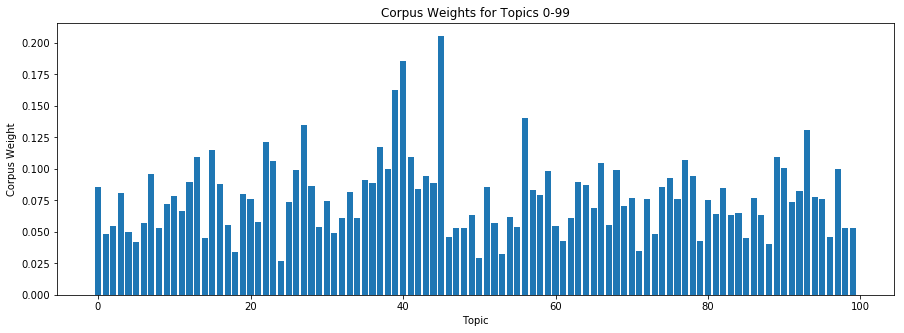

In [10]:
import matplotlib.pyplot as plt
topic_weight_list = []
X = []
# 计算每个topic的 corpus_weight
for i in range(0, 100):
    topic_weight_list.append(corpus_weight(i))
    X.append(i)
plt.figure(figsize=(15,5))
plt.bar(X, topic_weight_list)
    
plt.xlabel('Topic')  
plt.ylabel('Corpus Weight')  
plt.title('Corpus Weights for Topics 0-99')  
plt.savefig('figure corpus Weight')
plt.show()